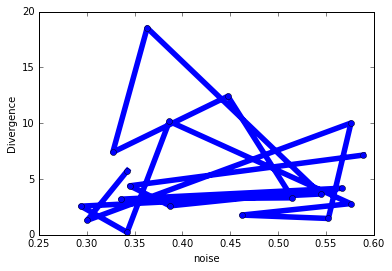

In [1]:
import os, sys
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

folder=['RUN1','RUN2','RUN3','RUN4','RUN5','RUN6','RUN7','RUN8','RUN9','RUN10','RUN11','RUN12','RUN13','RUN14','RUN15','RUN16','RUN17','RUN18','RUN19']
#folder=['RUN1']
l=np.arange(0.0,6.0,0.5)
divergence=[]
noise=[]
for i in range(len(folder)):
	d=[]
	error=[]
	BS=np.loadtxt('%s/BF_ref_normal.dat'%folder[i])
	for j in range(len(BS)):
		if list(BS[:,0])[j]==min(list(BS[:,0])):
			n=int(j)
	ref=list(np.loadtxt('%s/%.1f/populations_ref_normal.dat'%(folder[i],l[n]))[:,1])
	for k in range(1,len(l)):
		pop=list(np.loadtxt('%s/%.1f/populations_ref_normal.dat'%(folder[i],l[k]))[:,1])
		for m in range(len(pop)):

			if float(pop[m]) == 0.0 or float(ref[m]) == 0.0:
				d.append(0.0)
			else:
#				print pop[m], ref[m]
				d.append(pop[m]*np.log(pop[m]/ref[m]))
	divergence.append(sum(d))
	err=np.loadtxt('exp_noise/error_%d.dat'%i)
	for item in err:	
		error.append(abs(item))
	noise.append(np.mean(error))
plt.figure()
plt.plot(noise,divergence,'-o',linewidth=5.5)
plt.xlabel('noise')
plt.ylabel('Divergence')
plt.show()

